# **Computational Drug Discovery Comparing Regressors**




**We will use the Package of pycaret as its has low line of code for multiple regressors comparision and plots visualization.
 For interpertation models we use the Shap Package**

## **1. Install the Package's**

## **2. Load the data set**


**Import libraries**

In [1]:
import pandas as pd
from pycaret.regression import *

## **3. Data pre-processing**

Import Clean Fingerprint Files *.csv

In [2]:
ap2dc = pd.read_csv('AtomPair2DCount.csv')
#view
ap2dc

,Unnamed: 0,pIC50,APC2D1_N_N,APC2D1_N_O,APC2D2_N_N,APC2D2_N_O,APC2D2_N_S,APC2D2_O_O,APC2D2_X_X,APC2D3_N_N,APC2D3_N_O,APC2D3_N_S,APC2D3_N_Cl,APC2D3_N_X,APC2D3_O_O,APC2D4_N_N,APC2D4_N_O,APC2D4_N_F,APC2D4_N_Cl,APC2D4_O_O,APC2D4_F_F,APC2D4_Cl_X,APC2D5_C_C,APC2D5_N_N,APC2D5_N_O,APC2D5_N_S,APC2D5_N_F,APC2D5_O_O,APC2D5_O_F,APC2D6_C_O,APC2D6_N_N,APC2D6_N_O,APC2D6_N_S,APC2D6_N_F,APC2D6_N_Cl,APC2D6_O_O,APC2D6_O_F,APC2D6_O_Cl,APC2D7_N_N,APC2D7_N_O,APC2D7_N_S,APC2D7_N_F,APC2D7_N_Cl,APC2D7_O_O,APC2D7_O_F,APC2D8_N_N,APC2D8_N_O,APC2D8_N_F,APC2D8_O_O,APC2D8_O_F,APC2D8_O_Cl,APC2D9_C_N,APC2D9_C_S,APC2D9_C_F,APC2D9_N_O,APC2D9_N_F,APC2D9_N_Cl,APC2D9_O_O,APC2D9_O_X,APC2D9_Cl_X,APC2D10_N_N,APC2D10_N_O,APC2D10_N_F,APC2D10_O_O,APC2D10_O_F
0,1,8.958607,0,0,1,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,2,42,0,0,0,0,0,0,4,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,6,0,4,1,0,1,0,0,2,0,0,0,0,1
1,2,9.397940,0,0,1,2,0,1,0,0,0,0,2,2,0,0,0,0,0,0,0,1,34,0,2,0,0,0,0,14,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,7.356547,0,0,1,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,2,44,0,0,0,0,0,0,4,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,6,0,4,1,0,1,0,0,2,0,0,0,0,1
3,4,9.045757,0,0,1,2,0,0,0,0,0,0,2,2,0,0,1,0,0,0,0,2,28,0,0,0,0,0,0,7,0,1,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,3,0,0,0,0,0,2,0,0,0,0,1
4,5,8.522879,0,0,1,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,1,39,0,0,0,0,0,0,4,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,1,0,1,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,2182,5.853872,2,0,1,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,20,4,1,3,0,0,0,3,2,0,1,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,13,2,0,0,0,0,0,0,0,3,0,0,0,0
2182,2183,4.000000,1,0,1,1,0,0,1,2,0,1,2,4,0,0,0,2,1,0,0,0,14,0,1,3,0,0,2,3,0,0,1,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,9,0,4,0,0,0,0,0,0,3,0,6,0,0
2183,2184,8.301030,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,1,1,0,30,0,0,0,1,1,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,1,0,0,1,1,0,0,0,0,0,0
2184,2185,8.301030,1,0,1,2,0,0,0,1,0,0,0,0,0,3,3,0,0,0,0,0,23,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,0,0,1,0,0,0,0,0,0,0


In [3]:
model  = setup(data = ap2dc, target = 'pIC50', train_size=0.8, silent=True)


,Description,Value
0,session_id,5343
1,Target,pIC50
2,Original Data,"(2186, 65)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,60
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1748, 340)"


## **4. Compare ML algorithms**

In [4]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6391,0.7522,0.8646,0.4374,0.1101,0.0935,0.0720
knn,K Neighbors Regressor,0.6642,0.8080,0.8957,0.3964,0.1139,0.0973,0.0820
rf,Random Forest Regressor,0.6562,0.8120,0.8985,0.3943,0.1145,0.0966,0.7880
gbr,Gradient Boosting Regressor,0.7089,0.8430,0.9155,0.3709,0.1171,0.1046,0.3920
br,Bayesian Ridge,0.7720,0.9408,0.9679,0.2954,0.1243,0.1143,0.0820
et,Extra Trees Regressor,0.7028,0.9723,0.9819,0.2747,0.1243,0.1027,1.0640
ridge,Ridge Regression,0.7731,0.9785,0.9867,0.2672,0.1250,0.1132,0.0190
huber,Huber Regressor,0.7782,0.9931,0.9944,0.2556,0.1266,0.1149,0.4410
ada,AdaBoost Regressor,0.8324,1.0542,1.0251,0.2133,0.1305,0.1214,0.3290
omp,Orthogonal Matching Pursuit,0.8174,1.0678,1.0304,0.2016,0.1325,0.1212,0.0220


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5343, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Create Model On Selected Model**

In [5]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7002,0.9590,0.9793,0.2673,0.1274,0.1070
1,0.6110,0.6248,0.7904,0.5696,0.1023,0.0918
2,0.5943,0.6003,0.7748,0.5178,0.0969,0.0840
3,0.6549,0.7742,0.8799,0.3654,0.1085,0.0938
4,0.6710,0.7876,0.8875,0.3343,0.1090,0.0932
5,0.5534,0.5726,0.7567,0.5781,0.0979,0.0822
6,0.6554,0.8544,0.9243,0.4307,0.1189,0.0934
7,0.5948,0.7119,0.8437,0.4762,0.1096,0.0898
8,0.6881,0.8522,0.9231,0.3914,0.1173,0.1004
9,0.6684,0.7852,0.8861,0.4435,0.1131,0.0994


## **5. Tuning of model performance**

**Tuning the Hyperparameter**

In [6]:
tuned_lightgbm = tune_model(lightgbm, n_iter= 50,optimize='mae')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7580,1.0060,1.0030,0.2314,0.1305,0.1146
1,0.6112,0.6125,0.7826,0.5781,0.1025,0.0925
2,0.6072,0.5866,0.7659,0.5289,0.0962,0.0867
3,0.6488,0.7305,0.8547,0.4012,0.1062,0.0933
4,0.7073,0.8547,0.9245,0.2775,0.1132,0.0983
5,0.6082,0.6364,0.7977,0.5311,0.1032,0.0903
6,0.7156,0.9158,0.9569,0.3898,0.1225,0.1039
7,0.6142,0.6909,0.8312,0.4916,0.1071,0.0922
8,0.7091,0.8463,0.9199,0.3956,0.1164,0.1038
9,0.6509,0.7340,0.8567,0.4798,0.1085,0.0961


In [7]:
print(tuned_lightgbm)

LGBMRegressor(bagging_fraction=0.9, bagging_freq=5, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=61, min_child_weight=0.001, min_split_gain=0,
              n_estimators=240, n_jobs=-1, num_leaves=90, objective=None,
              random_state=5343, reg_alpha=0.3, reg_lambda=5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


**Model Hyperparameter**

Original Model Parameters

In [8]:
plot_model(lightgbm, 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


Tuned Model Parameters

In [9]:
plot_model(tuned_lightgbm, 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.05
max_depth,-1
min_child_samples,61
min_child_weight,0.001
min_split_gain,0
n_estimators,240


# **6. Model Analysis**

Details of the regression plots are available at https://pycaret.org/plot-model/.

**Residuals Plot**

In [10]:
plot_model(tuned_lightgbm, 'residuals' , save =True)

'Residuals.png'

**Prediction Error Plot**

In [11]:
plot_model(tuned_lightgbm, 'error', save =True)

'Prediction Error.png'

**Recursive Feature Selection**

In [12]:
#plot_model(tuned_lightgbm, 'rfe', save =True)

**Learning Curve**

In [13]:
plot_model(tuned_lightgbm, 'learning' , save =True ) 

'Learning Curve.png'

**Validation Curve**

In [14]:
plot_model(tuned_lightgbm, 'vc', save = True) 

'Validation Curve.png'

**Model Interpretaion**

SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

**Summary Plot**

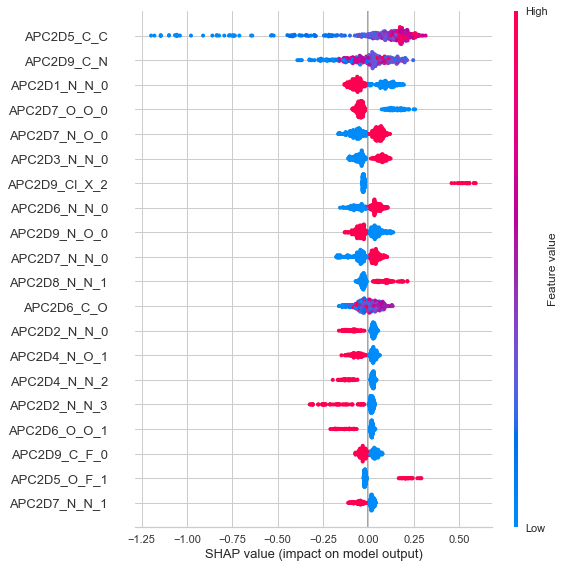

In [15]:
interpret_model(tuned_lightgbm, save =True)

**Correlation Plot**

**Reason Plot at Observation Level**

The Reason Plot at Observation Level as called by PyCaret is better known as the force plot and this plot essentially describes the push and pull effect that each individual features has on the base value that eventually leads to the predicted output value.


In [16]:
interpret_model(tuned_lightgbm, plot = 'reason', observation = 10 , save = True)  

# **Testing on 20% Model**

In [17]:
prediction_holdout = predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.6962,0.8430,0.9182,0.4677,0.1170,0.1013


In [18]:
# Predicted Value in "Label"  pIC50 experimantal
prediction_holdout.head()

,APC2D5_C_C,APC2D6_C_O,APC2D9_C_N,APC2D1_N_N_0,APC2D1_N_N_1,APC2D1_N_N_2,APC2D1_N_N_3,APC2D1_N_O_0,APC2D1_N_O_1,APC2D1_N_O_2,...,APC2D10_O_O_4,APC2D10_O_O_6,APC2D10_O_F_0,APC2D10_O_F_1,APC2D10_O_F_2,APC2D10_O_F_3,APC2D10_O_F_5,APC2D10_O_F_6,pIC50,Label
0,15.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.744728,7.375407
1,35.0,8.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.795880,7.365374
2,33.0,6.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.657578,7.202647
3,25.0,3.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.744728,6.926969
4,21.0,4.0,7.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.193820,7.037325


**Finalize Model**

In [19]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [20]:
#difference
lightgbm ,tuned_lightgbm , final_lightgbm

(LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5343, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 LGBMRegressor(bagging_fraction=0.9, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=61, min_child_weight=0.001, min_split_gain=0,
               n_estimators=240, n_jobs=-1, num_leaves=90, objective=None,
               random_state=5343, reg_alpha=0.3, reg_lambda=5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 LGBMReg

In [21]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.5458,0.5223,0.7227,0.6702,0.0931,0.0792


,APC2D5_C_C,APC2D6_C_O,APC2D9_C_N,APC2D1_N_N_0,APC2D1_N_N_1,APC2D1_N_N_2,APC2D1_N_N_3,APC2D1_N_O_0,APC2D1_N_O_1,APC2D1_N_O_2,...,APC2D10_O_O_4,APC2D10_O_O_6,APC2D10_O_F_0,APC2D10_O_F_1,APC2D10_O_F_2,APC2D10_O_F_3,APC2D10_O_F_5,APC2D10_O_F_6,pIC50,Label
0,15.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.744728,7.510178
1,35.0,8.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.795880,7.627998
2,33.0,6.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.657578,7.260765
3,25.0,3.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.744728,7.055845
4,21.0,4.0,7.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.193820,6.935506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,36.0,0.0,16.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.346787,6.315739
434,40.0,4.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.086186,8.733092
435,25.0,3.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.431798,7.099538
436,21.0,1.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.812479,7.927909


In [24]:
save_experiment('Atom2dCount_1')

NameError: name 'save_experiment' is not defined